In [2]:
import torch
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/ssd_scratch/sweta.jena/intermediate_counterfactuals_1536_shap_lime.csv')
df

,success,method,original_text,counterfactual_text,changed_word,semantic_similarity,perplexity,edit_distance,original_embedding,counterfactual_embedding,mced
0,1,SHAP,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('.', 'but')",0.970543,68.212875,0.054393,"[0.013422138057649136, -0.053415268659591675, ...","[0.019398581236600876, -0.06572108715772629, -...",0.000228
1,1,SHAP,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('.', 'and')",0.978007,73.863121,0.054393,"[0.013422138057649136, -0.053415268659591675, ...","[0.015377185307443142, -0.07203003764152527, 0...",0.000228
2,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'is')",0.996635,58.650864,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.05127648636698723, 0.023942530155181885, -...",0.000055
3,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'was')",0.999207,59.027668,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.04922273010015488, 0.028409594669938087, -...",0.000055
4,1,SHAP,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'bit')",0.999036,62.394833,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.048258453607559204, 0.030498158186674118, ...",0.000055
...,...,...,...,...,...,...,...,...,...,...,...
5081,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('hate', 'love')",0.999595,53.215462,0.005102,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.012373226694762707, -0.04725335165858269, ...",0.000026
5082,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('hate', 'loved')",0.998940,54.225185,0.005102,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.01377807930111885, -0.045362889766693115, ...",0.000026
5083,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('hate', 'liked')",0.999312,54.646229,0.005102,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.012758330442011356, -0.0461440235376358, -...",0.000026
5084,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('when', 'it')",0.997986,58.551083,0.015306,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.015417302027344704, -0.04528677463531494, ...",0.000078


In [3]:
df[df['method']=='SHAP'].tail(5)

,success,method,original_text,counterfactual_text,changed_word,semantic_similarity,perplexity,edit_distance,original_embedding,counterfactual_embedding,mced
4970,1,SHAP,"it is so bad, i can not tear myself away. i ke...","it is so intense, i can not tear myself away. ...","('bad', 'intense')",0.970936,40.968750,0.016854,"[-0.08280330151319504, -0.03764658421278, 0.02...","[-0.07130564749240875, -0.047327861189842224, ...",0.000095
4971,1,SHAP,"it is so bad, i can not tear myself away. i ke...","it is so beautiful, i can not tear myself away...","('bad', 'beautiful')",0.972394,40.958942,0.016854,"[-0.08280330151319504, -0.03764658421278, 0.02...","[-0.08511735498905182, -0.03151877224445343, 0...",0.000095
4972,1,SHAP,"it is so bad, i can not tear myself away. i ke...","it is so good, i can not tear myself away. i k...","('bad', 'good')",0.987518,40.834797,0.016854,"[-0.08280330151319504, -0.03764658421278, 0.02...","[-0.09776555001735687, -0.03516276180744171, 0...",0.000095
4973,1,SHAP,"it is so bad, i can not tear myself away. i ke...","it is so intense, i can not tear myself away. ...","('bad', 'intense')",0.970936,40.968750,0.016854,"[-0.08280330151319504, -0.03764658421278, 0.02...","[-0.07130564749240875, -0.047327861189842224, ...",0.000095
4974,1,SHAP,not only have i read the book and watched the ...,not only have i read the book and watched the ...,"('bad', 'great')",0.998599,54.979004,0.009132,"[-0.06822599470615387, -0.0434117466211319, -0...","[-0.06846172362565994, -0.047444965690374374, ...",0.000042


In [4]:
df[df['method']=='LIME']

,success,method,original_text,counterfactual_text,changed_word,semantic_similarity,perplexity,edit_distance,original_embedding,counterfactual_embedding,mced
69,1,LIME,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('hardly', 'also')",0.999909,46.457756,0.004184,"[0.013422138057649136, -0.053415268659591675, ...","[0.01318738516420126, -0.0536319762468338, 0.0...",0.000018
70,1,LIME,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('hardly', 'very')",0.999820,46.926071,0.004184,"[0.013422138057649136, -0.053415268659591675, ...","[0.014230109751224518, -0.05256657302379608, 0...",0.000018
71,1,LIME,"worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...","('nothing', 'much')",0.999605,49.230740,0.008368,"[0.013422138057649136, -0.053415268659591675, ...","[0.014682224951684475, -0.05426976457238197, 0...",0.000035
72,1,LIME,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'is')",0.996635,58.650864,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.05127648636698723, 0.023942530155181885, -...",0.000055
73,1,LIME,its a totally average film with a few semi - a...,its a totally average film with a few semi - a...,"('not', 'was')",0.999207,59.027668,0.007407,"[-0.04979100450873375, 0.030777275562286377, -...","[-0.04922273010015488, 0.028409594669938087, -...",0.000055
...,...,...,...,...,...,...,...,...,...,...,...
5081,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('hate', 'love')",0.999595,53.215462,0.005102,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.012373226694762707, -0.04725335165858269, ...",0.000026
5082,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('hate', 'loved')",0.998940,54.225185,0.005102,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.01377807930111885, -0.045362889766693115, ...",0.000026
5083,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('hate', 'liked')",0.999312,54.646229,0.005102,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.012758330442011356, -0.0461440235376358, -...",0.000026
5084,1,LIME,"i thought sleeper cell was interesting, and ex...","i thought sleeper cell was interesting, and ex...","('when', 'it')",0.997986,58.551083,0.015306,"[-0.009449707344174385, -0.04580977186560631, ...","[-0.015417302027344704, -0.04528677463531494, ...",0.000078


In [5]:
df.columns

Index(['success', 'method', 'original_text', 'counterfactual_text',
       'changed_word', 'semantic_similarity', 'perplexity', 'edit_distance',
       'original_embedding', 'counterfactual_embedding', 'mced'],
      dtype='object')

In [6]:
df['success'].value_counts(dropna=False)

success
1    4563
0     523
Name: count, dtype: int64

In [7]:
df[df["success"] == 0].groupby("method").mean(numeric_only=True).to_dict()

{'success': {'LIME': 0.0, 'SHAP': 0.0},
 'semantic_similarity': {'LIME': 0.7814877478227223,
  'SHAP': 0.7073450494851721},
 'perplexity': {'LIME': 332.65788564290085, 'SHAP': 313.4754692441539},
 'edit_distance': {'LIME': 0.17464662765217828, 'SHAP': 0.22044622327619678},
 'mced': {'LIME': 0.002383283175437446, 'SHAP': 0.0020658419812043445}}

In [8]:
summary = df[df["success"] == 1].groupby("method").mean(numeric_only=True).to_dict()
summary

{'success': {'LIME': 1.0, 'SHAP': 1.0},
 'semantic_similarity': {'LIME': 0.984574328636038,
  'SHAP': 0.9791062431315244},
 'perplexity': {'LIME': 63.53811000340686, 'SHAP': 64.36575950202295},
 'edit_distance': {'LIME': 0.015810561197267786, 'SHAP': 0.02120914573782994},
 'mced': {'LIME': 0.00013408053223112345, 'SHAP': 0.00015931878775308068}}

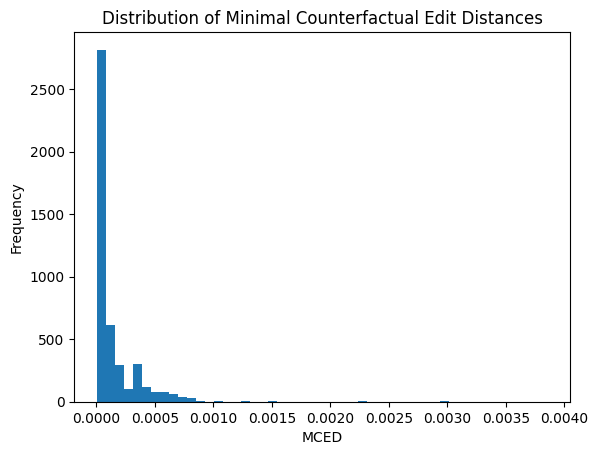

In [9]:
df_mced = df[df["success"]==1]  # only successful counterfactuals
plt.hist(df_mced["mced"], bins=50)
plt.xlabel("MCED")
plt.ylabel("Frequency")
plt.title("Distribution of Minimal Counterfactual Edit Distances")
plt.show()


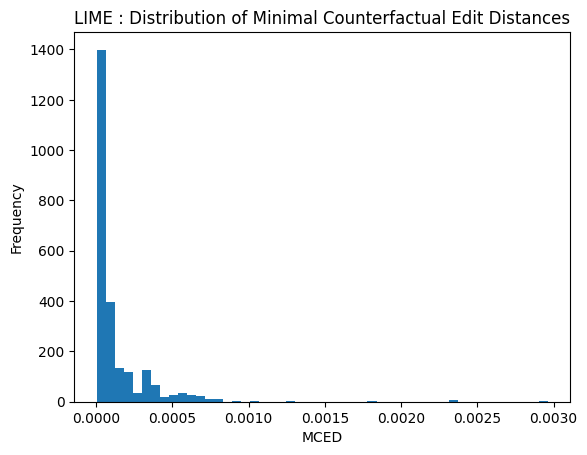

In [10]:
df_mced = df[(df["success"]==1) & (df["method"]=='LIME')]  # only successful counterfactuals
plt.hist(df_mced["mced"], bins=50)
plt.xlabel("MCED")
plt.ylabel("Frequency")
plt.title("LIME : Distribution of Minimal Counterfactual Edit Distances")
plt.show()

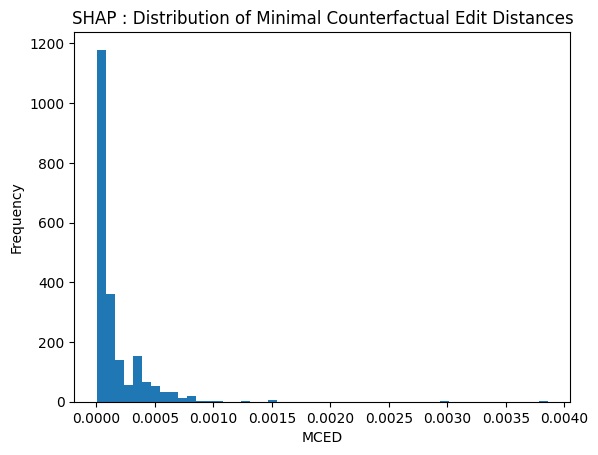

In [11]:
df_mced = df[(df["success"]==1) & (df["method"]=='SHAP')]  # only successful counterfactuals
plt.hist(df_mced["mced"], bins=50)
plt.xlabel("MCED")
plt.ylabel("Frequency")
plt.title("SHAP : Distribution of Minimal Counterfactual Edit Distances")
plt.show()
